In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
file_path = "Cleaned_Data.xlsx"
car_data = pd.read_excel(file_path, sheet_name="Cleaned_Data")
income_data = pd.read_excel(file_path, sheet_name="Average_Income_By_Year")

In [3]:
# Correction to 2018 ratio(All calculations will be preformed in 2018 dollars)
DOLLARS_TO_2018 = {
    2009: 1.17,
    2010: 1.152,
    2011: 1.116,
    2012: 1.094,
    2013: 1.078,
    2014: 1.061,
    2015: 1.059,
    2016: 1.046,
    2017: 1.024,
    2018: 1.000,
    2022: 0.8580308
}
MIN_YEAR = 2009
MAX_YEAR = 2018

In [4]:
# Filter car price data for years 2009-2018
car_data_filtered = car_data[car_data['Year'].between(MIN_YEAR, MAX_YEAR)]

In [5]:
# Convert price column to numeric
car_data_filtered.loc[:, 'Price'] = pd.to_numeric(car_data_filtered['Price'], errors='coerce')

In [6]:
# Calculate inflation-adjusted car prices
for year, rate in DOLLARS_TO_2018.items():
    car_data_filtered.loc[car_data_filtered['Year'] == year, 'Price'] *= rate

In [7]:
# Calculate the average car price per year
average_price_per_year = car_data_filtered.groupby('Year')['Price'].mean().astype(int)

In [8]:
# Select the columns for the years 2009 to 2018
selected_columns = income_data.loc[:, MAX_YEAR:MIN_YEAR]

In [9]:
# Calculate the mean income for each year
mean_income_per_year_USD2022 = income_data.mean()
mean_income_per_year_USD2022

2018    74450.588235
2017    72537.843137
2016    71006.666667
2015    69011.960784
2014    66798.823529
2013    66634.509804
2012    64576.274510
2011    64150.980392
2010    65271.764706
2009    65953.725490
dtype: float64

In [10]:
mean_income_per_year = (DOLLARS_TO_2018[2022] * mean_income_per_year_USD2022).astype(int)
mean_income_per_year

2018    63880
2017    62239
2016    60925
2015    59214
2014    57315
2013    57174
2012    55408
2011    55043
2010    56005
2009    56590
dtype: int64

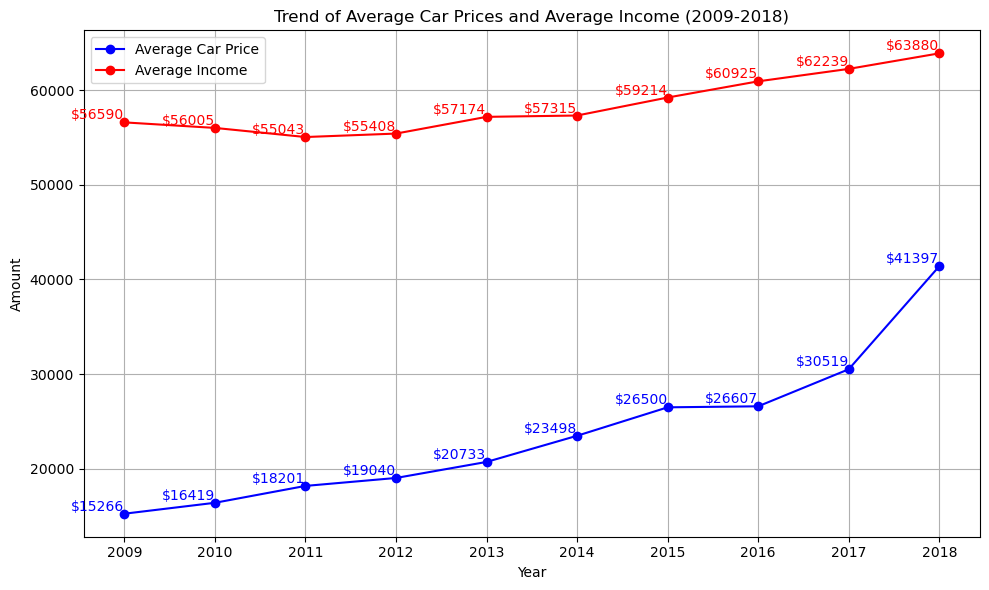

In [11]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(average_price_per_year.index, average_price_per_year.values, marker='o', color='b', label='Average Car Price')
plt.plot(mean_income_per_year.index, mean_income_per_year.values, marker='o', color='r', label='Average Income')
plt.title('Trend of Average Car Prices and Average Income (2009-2018)')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show every year on the x-axis
plt.xticks(average_price_per_year.index)

# Add labels for each point
for year, price in zip(average_price_per_year.index, average_price_per_year.values):
    plt.text(year, price, f"${price}", ha='right', va='bottom', fontsize=10, color='blue')

for year, income in zip(mean_income_per_year.index, mean_income_per_year.values):
    plt.text(year, income, f"${income}", ha='right', va='bottom', fontsize=10, color='red')

# Show plot
plt.show()

In [12]:
# Calculate the percentage of car price to income
percentage_change = (average_price_per_year / mean_income_per_year) * 100

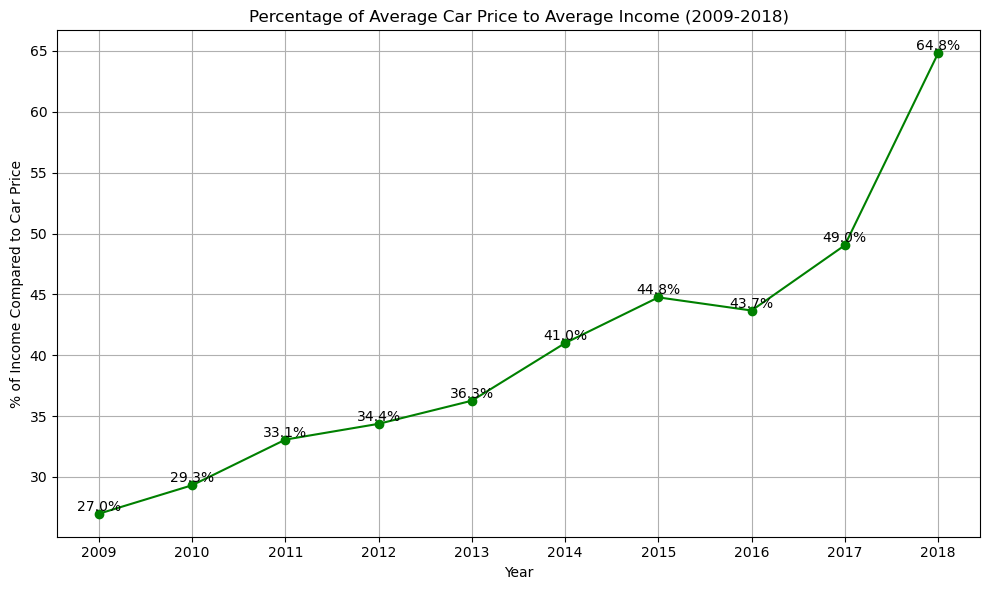

In [13]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(percentage_change.index, percentage_change.values, marker='o', color='g')
plt.title('Percentage of Average Car Price to Average Income (2009-2018)')
plt.xlabel('Year')
plt.ylabel('% of Income Compared to Car Price')
plt.grid(True)
plt.tight_layout()

# Label each point with the percentage value
for year, percentage in zip(percentage_change.index, percentage_change.values):
    plt.text(year, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

# Show every year on the x-axis
plt.xticks(percentage_change.index)

# Show plot
plt.show()